# 1.Preface

 
 YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. [According to Variety magazine](https://variety.com/2017/digital/news/youtube-2017-top-trending-videos-music-videos-1202631416/), “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for. In this paper we will explore Youtube trends using [Trending YouTube Video Statistics](https://www.kaggle.com/datasets/datasnaek/youtube-new) obtained from Kaggle.com.


# 2. Exploring and Importing

Import essential modules:

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
plt.style.use('fivethirtyeight')

First let's unpack the archive and check it content:

In [23]:
print([file for file in os.listdir() if
       (file.endswith('.csv')) | (file.endswith('.json'))])

['CAvideos.csv', 'CA_category_id.json', 'DEvideos.csv', 'DE_category_id.json', 'FRvideos.csv', 'FR_category_id.json', 'GBvideos.csv', 'GB_category_id.json', 'INvideos.csv', 'IN_category_id.json', 'JPvideos.csv', 'JP_category_id.json', 'KRvideos.csv', 'KR_category_id.json', 'MXvideos.csv', 'MX_category_id.json', 'RUvideos.csv', 'RU_category_id.json', 'USvideos.csv', 'US_category_id.json']


And take a brief look at the data:

In [24]:
dfIN = pd.read_csv('INvideos.csv', encoding='utf-8')
dfIN.head(3)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


In [25]:
dfIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

The dataset looks utterly clean but let's take a closer look at the video_id column:

In [26]:
print(dfIN['video_id'].value_counts())

#NAME?         511
rRr1qiJRsXk     16
l7E0kTvARsA     14
1J76wN0TPI4     14
WDiK14qI3pQ     13
              ... 
hOh8ck_ipHk      1
NHPPVfr24-Q      1
FeFEtBL4dcs      1
zvjNaSmQFLQ      1
3MTCSll3KGU      1
Name: video_id, Length: 16307, dtype: int64


We have got a potential problem here: videos with id #NAME? cannot be properly identified. We should take this into account while working with views,likes or dislikes statistics. Now let's check json file:

In [4]:
with open('CA_category_id.json', 'r') as f:
    categoryData = json.load(f)
dfCategoryCA = pd.json_normalize(categoryData, record_path='items')
dfCategoryCA.head()


,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


As shown above, data is included for the US, GB, DE, CA, FR, RU, MX, KR, JP and IN regions (USA, Great Britain, Germany, Canada, and France, Russia, Mexico, South Korea, Japan and India respectively), with up to 200 listed trending videos per day.
Each region’s data is in a separate file. Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count. The data also includes a category_id field, which varies between regions. Associated category can be found in corresponding *.json file.

Now we are going to combine separate files into one united dataframe with data for all regions:

In [28]:
# create a list of file names
csvFileNames = [file for file in os.listdir() if file.endswith('csv')]
jsonFileNames = [file for file in os.listdir() if file.endswith('json')]
fileNames = list(zip(csvFileNames, jsonFileNames))

In [29]:
# function creates df for each region
def makeRegionDF(csvFileName, jsonFileName):
    # discard unwanted columns while importing
    df = pd.read_csv(csvFileName, encoding='utf-8', usecols=
                     lambda x: x not in ['thumbnail_link', 'description'])
    df['region'] = csvFileName[:2]
    # import and transform json file
    with open(jsonFileName, 'r') as f:
        jsonData = json.load(f)
    categoryDF = pd.json_normalize(jsonData, record_path='items')
    categoryDF = categoryDF[['id', 'snippet.title']]
    categoryDF['id'] = categoryDF['id'].astype('float')
    categoryDF.rename(columns={'snippet.title': 'category',
                               'id': 'category_id'}, inplace=True)
    df = pd.merge(left=df, right=categoryDF, on='category_id')
    return df

In [11]:
# combine region data into final dataframe
regionDFlist = []
for file in list(fileNames):
    regionDFlist.append(makeRegionDF(*file))
df = pd.concat(regionDFlist, ignore_index=True)
# add country column
countryList = {'CA': 'Canada', 'US': 'United States', 'RU': 'Russia',
               'GB': 'Great Britain', 'MX': 'Mexico', 'JP': 'Japan',
               'KR': 'South Korea', 'IN': 'India', 'FR': 'France',
               'DE': 'Germany'}
df['country'] = df['region'].map(countryList)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373204 entries, 0 to 373203
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                373204 non-null  object
 1   trending_date           373204 non-null  object
 2   title                   373204 non-null  object
 3   channel_title           373204 non-null  object
 4   category_id             373204 non-null  int64 
 5   publish_time            373204 non-null  object
 6   tags                    373204 non-null  object
 7   views                   373204 non-null  int64 
 8   likes                   373204 non-null  int64 
 9   dislikes                373204 non-null  int64 
 10  comment_count           373204 non-null  int64 
 11  comments_disabled       373204 non-null  bool  
 12  ratings_disabled        373204 non-null  bool  
 13  video_error_or_removed  373204 non-null  bool  
 14  region                  373204 non-n

# 3. Popular Categories

## 3.1 Most viewed categories

Let's find most viewed categories on Youtube:

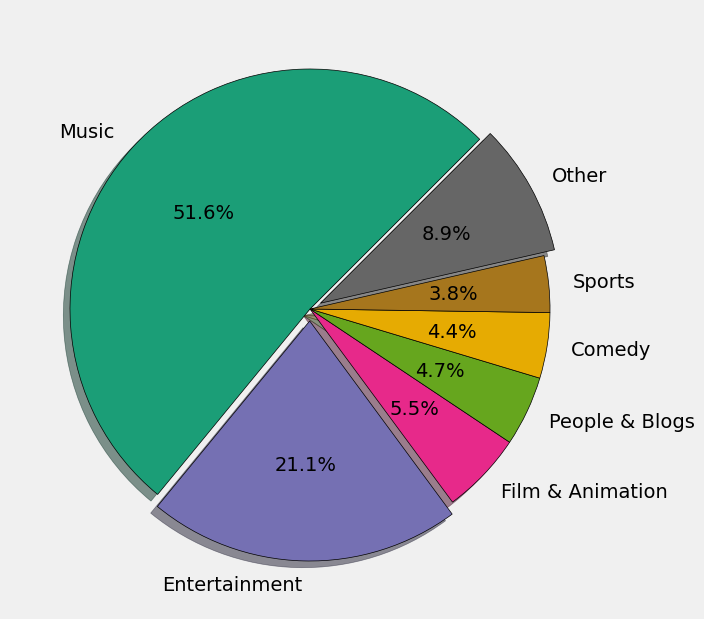

In [42]:
df1 = df.groupby('category').agg({'views': 'sum'}).sort_values(
    by='views', ascending=False)
df1 = df1.apply(lambda x: round(100 * x / float(x.sum()), 1))
#df1 = df1.loc[df1['views'] >= 3]

# create slices
slices = [x for x in df1['views'] if x>=3]
other = sum([x for x in df1['views'] if x<3])
slices.append(other)

# create labels
labels = list(df1.index[0:len(slices)-1])
labels.append('Other')

# colormap and style
cmap = mpl.cm.get_cmap('Dark2')
categoryColors = [cmap(x) for x in np.linspace(0.1, 1, len(slices))]
#plt.style.use('grayscale')
explode = [0 for x in range(len(slices))]
explode[1] = 0.05
explode[-1] = 0.05

# plot
fig, ax = plt.subplots(figsize=(4, 5))
fig.subplots_adjust(0.2,0,2,1.2)
pie = ax.pie(slices, labels=labels,
             wedgeprops={'edgecolor': 'black'},
             colors=categoryColors, explode=explode,
             shadow=True, startangle=45, autopct='%1.1f%%')

## 3.2 Do people in the different countries watch different video categories?

To address this question we will use sum of views for each category in each country. First, let's take top 5 most popular categories for each region:

In [30]:
df1 = df.groupby(['country', 'category']).agg({'views': 'sum'})
df1 = df1['views'].groupby('country', group_keys=False)
df1.apply(lambda x: x.sort_values(ascending=False).head(5))


country        category        
Canada         Entertainment        13671215509
               Music                13179850194
               Comedy                3708438785
               People & Blogs        3228227926
               Sports                2997652188
France         Music                 5026447522
               Entertainment         3779500229
               Sports                1996811039
               Comedy                1896284649
               People & Blogs        1280843533
Germany        Entertainment         8102638694
               Music                 5683870646
               People & Blogs        2193613268
               Sports                1938192278
               Film & Animation      1757184336
Great Britain  Music               171160864769
               Entertainment        29786283041
               Film & Animation      8362707626
               People & Blogs        5754287829
               Comedy                3962062143
India   

This table is hard to read, so let's better create a plot. Also we will use percentage of total views instead of views count:

In [31]:
# calculate percentage of total
df2 = df.groupby(['country', 'category']).agg({'views': 'sum'})
df2 = df2.groupby(level=0, group_keys=False).apply(
    lambda x: round(100 * x / float(x.sum()), 1))
df2 = df2['views'].groupby('country', group_keys=False)
df2 = df2.apply(lambda x: x.sort_values(ascending=False).head(5)).reset_index()

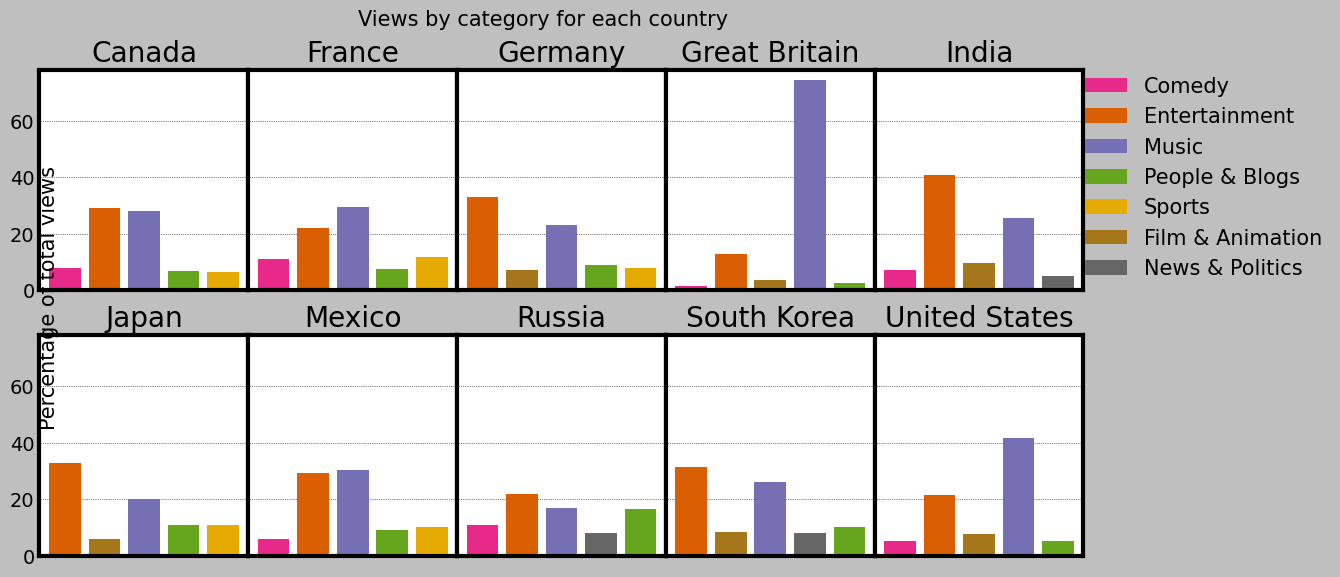

In [43]:
#  create colorMap
category = df2['category'].unique()
plt.style.use('grayscale')
cmap = mpl.cm.get_cmap('Dark2')
categoryColors = [cmap(x) for x in np.linspace(0.15, 1, len(category))]
colorMap = {category[i]: categoryColors[i] for i, _ in enumerate(category)}
df2['color'] = df2['category'].map(colorMap)

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6),
                        subplot_kw={'xticks': []}, sharey=True)

# auxiliary variables
regionList = df2['country'].unique()
handles = []
labels = []

# plot bar charts
for i, region in enumerate(regionList):
    regionData = df2.groupby(
        'country').get_group(region).reset_index().sort_values(by='category')
    axs.flat[i].bar(regionData['category'], regionData['views'],
                    color=regionData['color'], label=regionData['category'])
    axs.flat[i].grid(visible=True, linestyle='dotted', linewidth=0.5)
    # get handles and labels for legend
    line = axs.flat[i].get_legend_handles_labels()
    for handle in line[0]:
        handles.append(handle)
    for label in line[1]:
        labels.append(label)
    axs.flat[i].set_title(regionData.loc[0, 'country'])
# get unique labels with dict
legendDict = {labels[i]: handles[i] for i, _ in enumerate(labels)}

legend = fig.legend(handles=legendDict.values(), labels=legendDict.keys(),
                    loc="lower center",
                    bbox_to_anchor=(1.05, 0.5), frameon=False, fontsize=15)
fig.subplots_adjust(wspace=0, hspace=0.2)
text = fig.text(0.08, 0.5, 'Percentage of total views', va='center',
                rotation='vertical', fontsize=15)
sup = fig.suptitle('Views by category for each country',
                   fontsize=15)

As we can see, most people prefer Entertainment and Music videos on Youtube and this behavior doesn't change among regions. People & Blogs is the third most popular category; only India's top 5 doesn't include it. Other popular categories are News & Politics, Film & Animation, Sports and Comedy. Americans, British, French and Mexicans prefer Music over Entertainment. . News & Politics is being watched mostly in Russia, South Korea and India. Viewers from France, Canada, Germany, Japan and Mexico also like Sports. 

## 3.3 Do british love music so much?

In previous section we have found out that 74.5% of all Youtube views in Great Britain belong to Music category. Do british love music that much? Let's check out.  First we will find what percentage of all viewed video in GB belongs to Music category.

In [13]:
dfMusic = df.loc[df['category'] == 'Music']
dfMusic = dfMusic.groupby('country').agg({'video_id': 'count'})
dfCount = df.groupby('country').agg({'video_id': 'count'})
dfMusicPercentage = round((dfMusic/dfCount)*100,2)
dfMusicPercentage.rename(columns={'video_id': 'percentage of music videos'},
                         inplace=True)
dfMusicPercentage.sort_values(by='percentage of music videos', ascending=False)

,percentage of music videos
country,
Great Britain,35.42
United States,15.81
India,10.36
France,9.72
Canada,9.14
Mexico,8.39
Japan,6.29
Germany,5.84
South Korea,5.32


Wow, there are a lot of music videos in GB segment of Youtube. Let's find most viewed of them:

In [14]:
filt = (df['region'] == 'GB') & (df['category'] == 'Music')
dfMusicGB = df.loc[filt]
dfCount = dfMusicGB.sort_values(by='views', ascending=False)
dfCount = dfCount[['title','channel_title','views','likes','dislikes']].head(200)
dfCount.describe(include='all')



,title,channel_title,views,likes,dislikes
count,200,200,2.000000e+02,2.000000e+02,200.000000
unique,15,14,NaN,NaN,NaN
top,Childish Gambino - This Is America (Official V...,Ozuna,NaN,NaN,NaN
freq,29,31,NaN,NaN,NaN
mean,NaN,NaN,2.014068e+08,2.742728e+06,142420.900000
std,NaN,NaN,6.928671e+07,1.306251e+06,81853.516728
min,NaN,NaN,1.165814e+08,7.606930e+05,38767.000000
25%,NaN,NaN,1.431616e+08,1.558031e+06,89874.000000
50%,NaN,NaN,1.868690e+08,2.631038e+06,126952.500000
75%,NaN,NaN,2.432606e+08,3.693078e+06,162354.000000


In [87]:
df.groupby('video_id').agg({'video_id': 'count'}).rename(columns={'video_id':'count'}).sort_values(by='count', ascending=False)

,count
video_id,
#NAME?,2286
VYOjWnS4cMY,92
UUkn-enk2RU,89
tCXGJQYZ9JA,83
iWZmdoY1aTE,82
...,...
PGfP8fMSjJo,1
PGeuM8Sf79g,1
PGdxq4bx5-k,1


In [94]:
filt = ( df['video_id'] == 'VYOjWnS4cMY') & (df['trending_date'] == '18.08.05')
df[filt]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,region,category,country
3041,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405376,51548,149478,False,False,False,CA,Music,Canada
78035,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405366,51548,149473,False,False,False,DE,Music,Germany
120810,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405381,51548,149478,False,False,False,FR,Music,France
143973,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405356,51548,149473,False,False,False,GB,Music,Great Britain
237807,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405391,51548,149478,False,False,False,KR,Music,South Korea
282793,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405409,51550,149478,False,False,False,MX,Music,Mexico
331579,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405392,51548,149478,False,False,False,RU,Music,Russia
363175,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,False,False,False,US,Music,United States


In [103]:
dfCA = pd.read_csv('CAvideos.csv', encoding='utf-8')
filt = ( dfCA['video_id'] == 'VYOjWnS4cMY') & (dfCA['trending_date'] == '18.08.05')
dfCA.loc[filt]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
33314,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405376,51548,149478,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...


In [12]:
df['video_id'].value_counts()

#NAME?         2286
VYOjWnS4cMY      92
UUkn-enk2RU      89
tCXGJQYZ9JA      83
iWZmdoY1aTE      82
               ... 
2ZIHzE5EO4E       1
xnC0BDZa_aM       1
wNiDGbmOFVM       1
tFJtd3If2hU       1
ZPYvt7efzUE       1
Name: video_id, Length: 182317, dtype: int64

In [16]:
df.loc[df['video_id']=='#NAME?'].shape

(2286, 17)